In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv("EngineFaultDB.csv")

In [3]:
print(data.head())

   Fault    MAP    TPS  Force  Power       RPM  Consumption L/H  \
0      0  3.549  1.889  7.428  5.227  1192.769            3.057   
1      0  3.559  1.899  7.646  5.327  1145.191            2.914   
2      0  3.539  1.899  7.578  5.100  1208.505            2.976   
3      0  3.519  1.889  7.371  5.255  1164.127            2.908   
4      0  3.549  1.879  7.405  5.177  1172.032            2.898   

   Consumption L/100KM   Speed     CO       HC     CO2     O2  Lambda     AFR  
0               11.720  24.901  0.460  196.089  14.356  1.080   1.047  15.385  
1               11.276  25.030  0.478  196.283  14.492  1.107   1.083  15.926  
2               11.926  24.213  0.464  200.367  14.443  1.099   1.072  15.754  
3               11.786  24.407  0.471  195.345  13.853  1.076   1.006  14.787  
4               12.169  24.875  0.468  194.979  13.752  1.060   0.984  14.470  


In [31]:
correlation_matrix = data.drop(columns=['Fault']).corr()

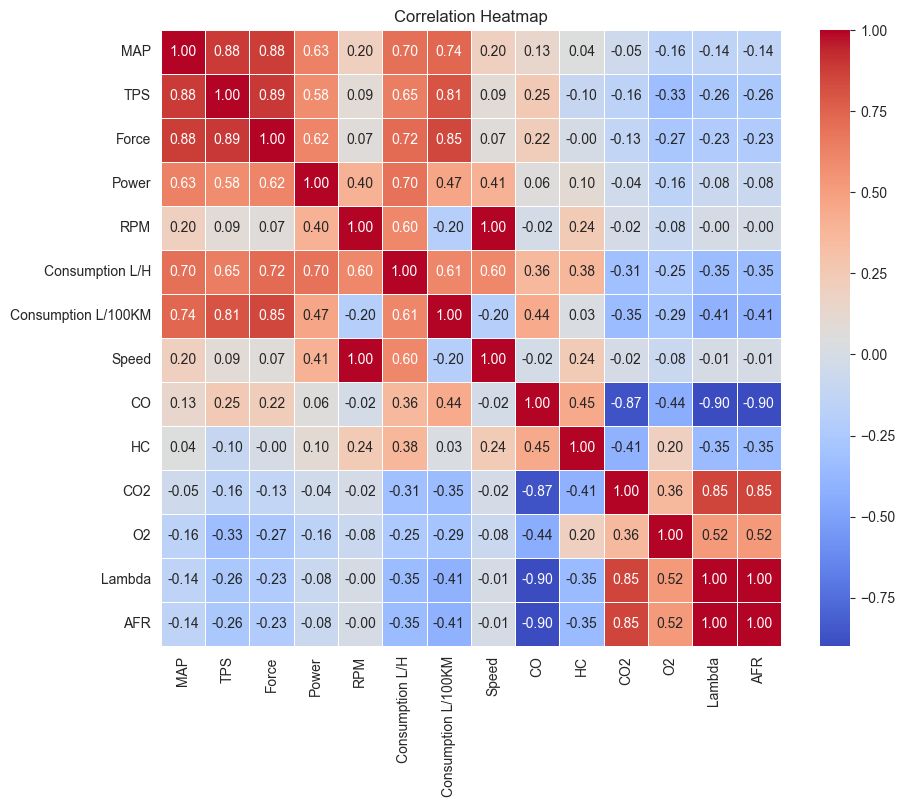

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [6]:
X = data.drop(columns=['Fault'])
y = data['Fault']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
logreg_model = LogisticRegression(max_iter=5000, random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.69      0.65      3200
           1       0.65      0.56      0.60      2200
           2       0.46      0.63      0.53      3000
           3       0.45      0.25      0.32      2800

    accuracy                           0.54     11200
   macro avg       0.54      0.53      0.53     11200
weighted avg       0.54      0.54      0.53     11200

Accuracy: 0.5385714285714286


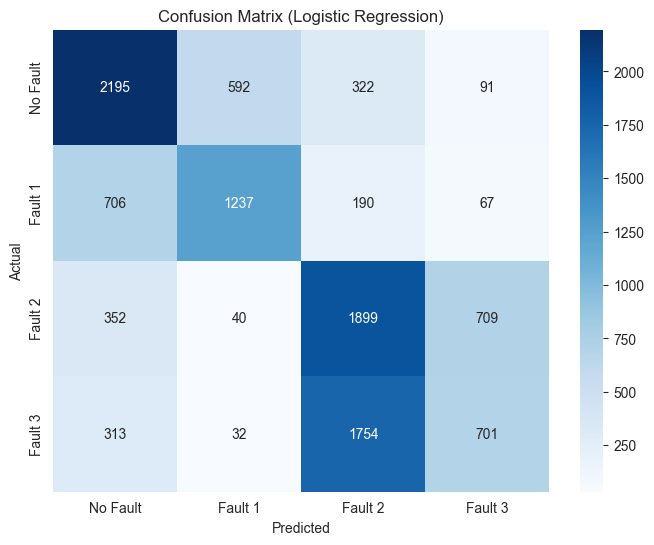

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fault", "Fault 1", "Fault 2", "Fault 3"], yticklabels=["No Fault", "Fault 1", "Fault 2", "Fault 3"])
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [12]:
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.45      0.52      3200
           1       0.56      0.64      0.60      2200
           2       0.39      0.35      0.37      3000
           3       0.36      0.48      0.41      2800

    accuracy                           0.47     11200
   macro avg       0.48      0.48      0.48     11200
weighted avg       0.48      0.47      0.47     11200

Accuracy: 0.468125


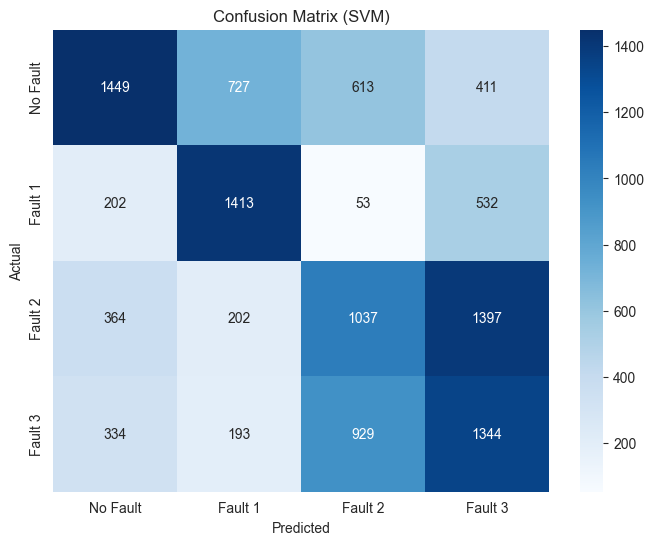

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fault", "Fault 1", "Fault 2", "Fault 3"], yticklabels=["No Fault", "Fault 1", "Fault 2", "Fault 3"])
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
# KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [15]:
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3200
           1       0.99      0.99      0.99      2200
           2       0.53      0.53      0.53      3000
           3       0.49      0.49      0.49      2800

    accuracy                           0.74     11200
   macro avg       0.75      0.75      0.75     11200
weighted avg       0.74      0.74      0.74     11200

Accuracy: 0.7426785714285714


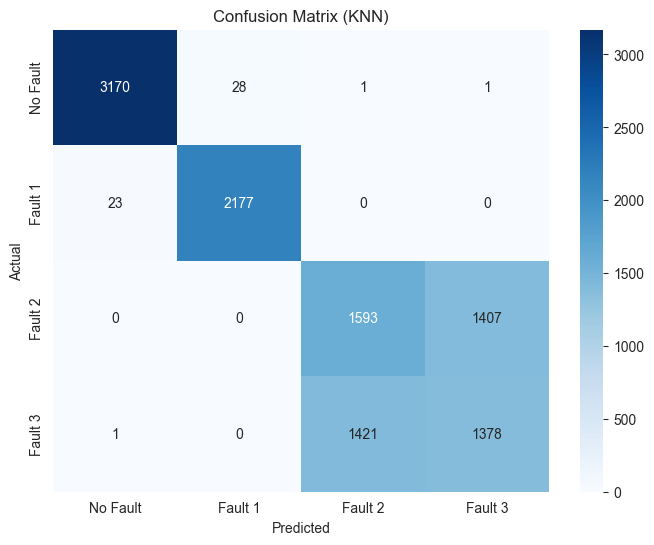

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fault", "Fault 1", "Fault 2", "Fault 3"], yticklabels=["No Fault", "Fault 1", "Fault 2", "Fault 3"])
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [18]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3200
           1       1.00      1.00      1.00      2200
           2       0.53      0.53      0.53      3000
           3       0.50      0.50      0.50      2800

    accuracy                           0.75     11200
   macro avg       0.76      0.76      0.76     11200
weighted avg       0.75      0.75      0.75     11200

Accuracy: 0.7482142857142857


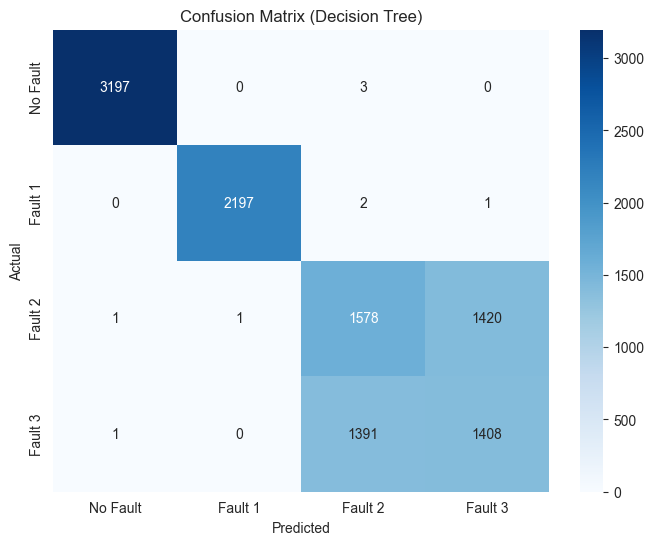

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fault", "Fault 1", "Fault 2", "Fault 3"], yticklabels=["No Fault", "Fault 1", "Fault 2", "Fault 3"])
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [20]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [21]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3200
           1       1.00      1.00      1.00      2200
           2       0.52      0.54      0.53      3000
           3       0.49      0.48      0.48      2800

    accuracy                           0.75     11200
   macro avg       0.75      0.75      0.75     11200
weighted avg       0.75      0.75      0.75     11200

Accuracy: 0.7454464285714286


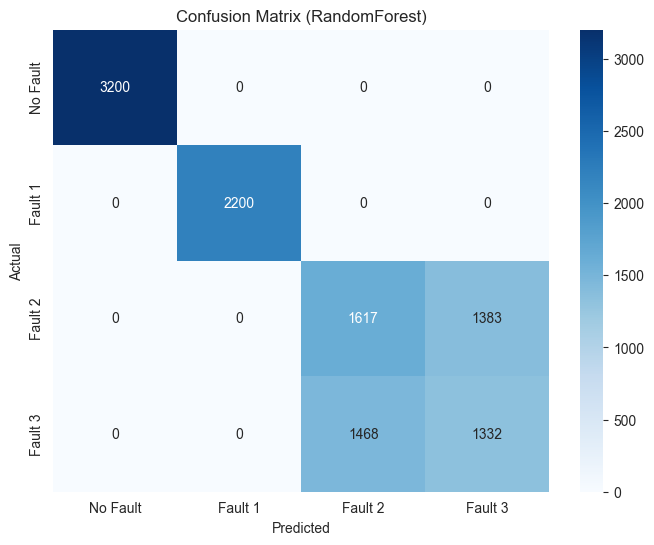

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fault", "Fault 1", "Fault 2", "Fault 3"], yticklabels=["No Fault", "Fault 1", "Fault 2", "Fault 3"])
plt.title("Confusion Matrix (RandomForest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [24]:
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3200
           1       1.00      1.00      1.00      2200
           2       0.53      0.54      0.53      3000
           3       0.50      0.49      0.49      2800

    accuracy                           0.75     11200
   macro avg       0.76      0.76      0.76     11200
weighted avg       0.75      0.75      0.75     11200

Accuracy: 0.7483928571428572


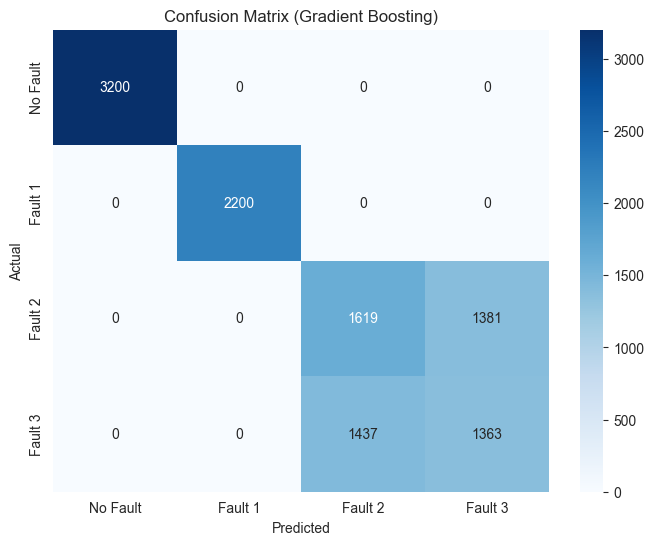

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fault", "Fault 1", "Fault 2", "Fault 3"], yticklabels=["No Fault", "Fault 1", "Fault 2", "Fault 3"])
plt.title("Confusion Matrix (Gradient Boosting)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [26]:
xgb_model = XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', random_state=42, use_label_encoder=False)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:16:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [27]:
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3200
           1       1.00      1.00      1.00      2200
           2       0.54      0.52      0.53      3000
           3       0.50      0.52      0.51      2800

    accuracy                           0.75     11200
   macro avg       0.76      0.76      0.76     11200
weighted avg       0.75      0.75      0.75     11200

Accuracy: 0.7510714285714286


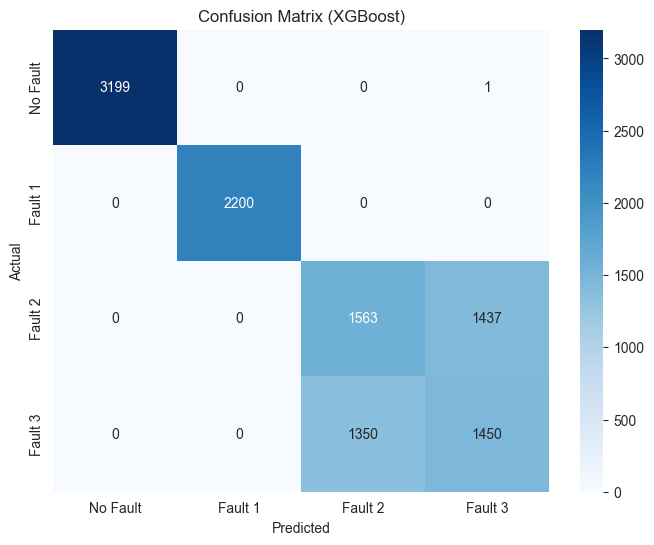

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fault", "Fault 1", "Fault 2", "Fault 3"], yticklabels=["No Fault", "Fault 1", "Fault 2", "Fault 3"])
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()